In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

In [82]:
df = pd.read_csv("bank_train_prepared2.csv")
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (2000, 32)


In [68]:
min_max_scaler = preprocessing.MinMaxScaler()
data2 = min_max_scaler.fit_transform(data)

In [81]:
df

,Unnamed: 0,age,education,balance,day,month,duration,campaign,pdays,job_blue-collar,...,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,TotalContacts,cluster
0,0,0.580352,1.0,0.672849,1,4,1.626181,2,0.564738,0,...,0,0,0,1,0,1,0,0,0.694812,0
1,1,0.777284,0.5,0.772393,1,4,0.681643,2,0.571205,0,...,0,0,0,0,0,1,1,0,0.512824,0
2,2,1.189874,0.5,0.877721,1,4,0.417326,2,0.865103,0,...,0,0,1,0,0,1,1,0,0.512824,0
3,3,0.963174,0.5,0.674968,1,4,0.766904,1,0.862697,1,...,0,0,1,0,0,1,1,0,0.512824,0
4,4,1.101571,0.5,0.868750,1,4,1.109525,1,1.016414,0,...,0,0,1,0,0,1,0,0,0.290179,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,0.113329,0.5,1.285967,16,9,0.867335,2,0.005761,0,...,0,1,0,1,0,0,0,1,0.290179,1
1996,1996,0.447531,0.5,0.574458,16,9,1.902473,2,0.005761,0,...,0,1,0,1,0,0,0,1,0.290179,1
1997,1997,1.506051,0.0,0.911431,17,9,0.677293,1,0.005761,0,...,0,1,1,0,0,0,0,1,0.003328,1
1998,1998,0.941742,0.0,1.547107,20,9,0.571610,1,0.005761,0,...,0,1,1,0,0,1,0,1,0.003328,1


In [83]:
data

array([[0.00000000e+00, 5.80351686e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.94812460e-01],
       [1.00000000e+00, 7.77284060e-01, 5.00000000e-01, ...,
        1.00000000e+00, 0.00000000e+00, 5.12823626e-01],
       [2.00000000e+00, 1.18987388e+00, 5.00000000e-01, ...,
        1.00000000e+00, 0.00000000e+00, 5.12823626e-01],
       ...,
       [1.99700000e+03, 1.50605076e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 3.32779009e-03],
       [1.99800000e+03, 9.41741864e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 3.32779009e-03],
       [1.99900000e+03, 8.02499717e-01, 5.00000000e-01, ...,
        0.00000000e+00, 1.00000000e+00, 2.90178953e-01]])

In [84]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [73]:
k = 3

In [85]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

In [86]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

In [87]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


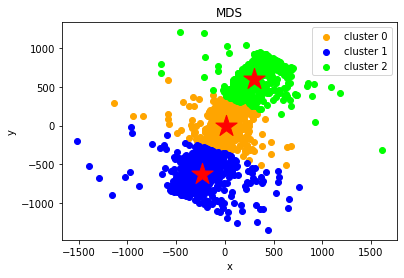

In [88]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

In [89]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


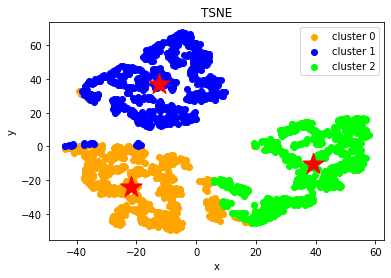

In [90]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

In [91]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [92]:
df.head()

,Unnamed: 0,age,education,balance,day,month,duration,campaign,pdays,job_blue-collar,...,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,TotalContacts,cluster
0,0,0.580352,1.0,0.672849,1,4,957,2,0.564738,0,...,0,0,0,1,0,1,0,0,0.694812,2
1,1,0.777284,0.5,0.772393,1,4,233,2,0.571205,0,...,0,0,0,0,0,1,1,0,0.512824,2
2,2,1.189874,0.5,0.877721,1,4,126,2,0.865103,0,...,0,0,1,0,0,1,1,0,0.512824,2
3,3,0.963174,0.5,0.674968,1,4,274,1,0.862697,1,...,0,0,1,0,0,1,1,0,0.512824,2
4,4,1.101571,0.5,0.868750,1,4,479,1,1.016414,0,...,0,0,1,0,0,1,0,0,0.290179,2


In [93]:
df.tail()

,Unnamed: 0,age,education,balance,day,month,duration,campaign,pdays,job_blue-collar,...,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,TotalContacts,cluster
1995,1995,0.113329,0.5,1.285967,16,9,327,2,0.005761,0,...,0,1,0,1,0,0,0,1,0.290179,1
1996,1996,0.447531,0.5,0.574458,16,9,1334,2,0.005761,0,...,0,1,0,1,0,0,0,1,0.290179,1
1997,1997,1.506051,0.0,0.911431,17,9,231,1,0.005761,0,...,0,1,1,0,0,0,0,1,0.003328,1
1998,1998,0.941742,0.0,1.547107,20,9,185,1,0.005761,0,...,0,1,1,0,0,1,0,1,0.003328,1
1999,1999,0.802500,0.5,1.812451,22,9,208,2,0.005761,0,...,0,1,1,0,0,0,0,1,0.290179,1


In [94]:
df.groupby('cluster').mean()

,Unnamed: 0,age,education,balance,day,month,duration,campaign,pdays,job_blue-collar,...,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,TotalContacts
cluster,,,,,,,,,,,,,,,,,,,,,
0,997.524691,0.778464,0.629630,0.852492,13.746914,5.475309,275.652778,1.930556,0.482950,0.172840,...,0.092593,0.199074,0.375000,0.552469,0.351852,0.010802,0.510802,0.111111,0.49537,0.581260
1,1658.901325,0.812791,0.646539,0.967179,16.245950,7.104566,395.985272,1.814433,0.493436,0.072165,...,0.101620,0.462445,0.310751,0.488954,0.409426,0.000000,0.187040,0.036819,1.00000,0.658549
2,336.121842,0.813164,0.574294,0.784045,11.536404,2.426449,202.888559,1.985141,0.831450,0.203566,...,0.026746,0.001486,0.000000,0.625557,0.249629,0.011887,0.750371,0.227340,0.00000,0.724209


In [95]:
df['cluster'].value_counts()

1    679
2    673
0    648
Name: cluster, dtype: int64